# Introduction to Transformer-Based Neural Machine Translation Models

### Transformer-Based Neural Machine Translation (NMT) Models

Transformer-Based Neural Machine Translation (NMT) models are a type of neural network architecture designed for transforming one sequence into another sequence. They are widely used in various natural language processing (NLP) tasks, such as:

- **Machine Translation**: Translating text from one language to another.
- **Text Summarization**: Condensing long articles or documents into shorter summaries.
- **Speech Recognition**: Converting spoken language into written text.
- **Question Answering**: Generating answers to questions based on context.
- **Chatbots**: Generating responses in conversational AI systems.

### How Transformer Models Work

Transformer models typically consist of an encoder and a decoder, similar to Sequence-to-Sequence (Seq2Seq) models, but with key differences in their architecture.


- **Encoder**: Processes the input sequence using self-attention mechanisms and positional encodings to generate a series of context-rich embeddings.
- **Decoder**: Takes the encoder's output and, using self-attention and encoder-decoder attention mechanisms, generates the output sequence one token at a time.

### Advantages of Transformer-Based Models

Transformer-based models have several advantages over traditional Seq2Seq models with LSTM:

- **Parallelization**: Transformers can process entire sequences in parallel, making them faster and more efficient.
- **Long-Range Dependencies**: The self-attention mechanism enables better capture of long-range dependencies compared to LSTMs.
- **Scalability**: Transformers can be scaled to larger datasets and more complex tasks with relative ease.

### Helsinki-NLP/opus-mt-en-hi Model (pre-trained model)
Helsinki-NLP's opus-mt-en-hi model is a Transformer-based NMT model designed specifically for translating text from English to Hindi. This model leverages the powerful self-attention mechanism of Transformers to provide high-quality translations by effectively capturing contextual information across the entire input sequence.

- **Self-Attention**: Allows the model to weigh the importance of different words in the input sequence, regardless of their position, enhancing its ability to understand context.
- **Positional Encoding**: Adds information about the position of each token in the sequence, which is crucial since Transformer models do not process tokens sequentially like RNNs or LSTMs.


## Fine-Tuning Pre-Trained Models

### What is Fine-Tuning?

Fine-tuning involves taking a pre-trained model and training it further on a specific task or dataset. Pre-trained models have already learned general language patterns from large datasets, which makes them a strong starting point for more specific tasks.

### Why Fine-Tuning is Important

1. **Leverages Pre-trained Knowledge**: Pre-trained models have already captured a lot of linguistic information, which can be adapted to the specific task with less data and computational resources.
2. **Improves Performance**: Fine-tuning on a specific dataset improves the model's performance on that dataset as it learns task-specific nuances.
3. **Reduces Training Time**: Training a model from scratch can be computationally expensive and time-consuming. Fine-tuning reduces this burden by building on an existing model.

### Steps in Fine-Tuning

1. **Select a Pre-trained Model**: Choose a model that has been pre-trained on a large dataset and is suitable for the task at hand. In our case, we use the `Helsinki-NLP/opus-mt-en-hi` model for English to Hindi translation.
2. **Load and Preprocess Data**: Load the dataset specific to the task and preprocess it to match the input format expected by the model.
3. **Modify the Model Architecture (if necessary)**: Sometimes, minor adjustments are needed to tailor the pre-trained model to the specific task.
4. **Train the Model on the Specific Dataset**: Fine-tune the model by training it on the task-specific dataset. This involves adjusting the learning rate, batch size, and other hyperparameters.
5. **Evaluate and Validate**: Assess the model's performance using appropriate evaluation metrics and validation datasets to ensure it generalizes well to unseen data.


### Benefits of Fine-Tuning

- **Adaptability**: Fine-tuning allows pre-trained models to adapt to specific tasks or domains, improving their effectiveness.
- **Efficiency**: Leveraging pre-trained models reduces the need for extensive data and computational resources.
- **Performance**: Fine-tuned models typically perform better on specific tasks compared to models trained from scratch.


## Checking for GPU Availability

In [1]:
#Checking if GPU is running or not
!nvidia-smi

Sat Jul  6 20:38:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install datasets transformers[sentencepiece] sacrebleu -q

## Importing Libraries and Setting Up


In [3]:
import os
import sys
import transformers
import tensorflow as tf
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq
from transformers import AdamWeightDecay
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM
import torch

In [4]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-hi"

## Helsinki-NLP/opus-mt-en-hi model

source: https://huggingface.co/Helsinki-NLP/opus-mt-en-hi



# The Dataset

Source: https://huggingface.co/datasets/cfilt/iitb-english-hindi

In [5]:
raw_datasets = load_dataset("cfilt/iitb-english-hindi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

In [ ]:
raw_datasets

In [7]:
raw_datasets['train'][1]

{'translation': {'en': 'Accerciser Accessibility Explorer',
  'hi': 'एक्सेर्साइसर पहुंचनीयता अन्वेषक'}}

## Tokenization###
### What is Tokenization?
Tokenization is the process of converting raw text into a sequence of tokens. Tokens are the basic units of text that a model can process, which might include words, subwords, or even characters. The primary goal of tokenization is to transform text data into numerical representations that can be fed into neural networks.

### Why is Tokenization Important?
Tokenization is a crucial step in NLP because models cannot directly process raw text. They require numerical input, and tokenization bridges this gap by converting text into integers or floating-point numbers. This step ensures that the text data is in a format suitable for model training and inference.

### Tokenization in Practice
In this example, we use the AutoTokenizer from the Hugging Face transformers library. This tokenizer is pre-trained and tailored for the specific model we are using (Helsinki-NLP/opus-mt-en-hi), ensuring compatibility and optimal performance.

In [8]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


##

In [9]:
tokenizer("Hello, this is a sentence!")

{'input_ids': [12110, 2, 90, 23, 19, 8800, 61, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[12110, 2, 90, 23, 19, 8800, 61, 0], [239, 23, 414, 8800, 3, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [11]:
with tokenizer.as_target_tokenizer():
    print(tokenizer(["एक्सेर्साइसर पहुंचनीयता अन्वेषक"]))

{'input_ids': [[26618, 16155, 346, 33383, 0]], 'attention_mask': [[1, 1, 1, 1, 1]]}


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


## Preprocessing the Data


In [12]:
max_input_length = 128
max_target_length = 128

source_lang = "en"
target_lang = "hi"


def preprocess_function(examples):
    inputs = [ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [13]:
preprocess_function(raw_datasets["train"][:2])

{'input_ids': [[3872, 85, 2501, 132, 15441, 36398, 0], [32643, 28541, 36253, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]], 'labels': [[63, 2025, 18, 16155, 346, 20311, 24, 2279, 679, 0], [26618, 16155, 346, 33383, 0]]}

In [14]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/2507 [00:00<?, ? examples/s]

## Loading the Model

In [15]:
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint, from_pt = True)

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFMarianMTModel.

All the weights of TFMarianMTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


## Setting Up Training Parameters

In [17]:
batch_size = 16
learning_rate = 2e-5
weight_decay = 0.01
num_train_epochs = 1

## Data Collation
### What is Data Collation?
Data collation is the process of merging individual samples into batches. In NLP, this often involves padding sequences to ensure that all sequences in a batch have the same length, which is necessary for efficient computation on GPUs.

### Why is Data Collation Important?
Batches are used to speed up training by processing multiple samples simultaneously. However, sequences in natural language data can vary in length. Data collation ensures that these sequences are padded to a uniform length, enabling the use of parallel computation and optimizing memory usage.

### Custom Data Collator
In this example, we create a custom data collator to handle specific requirements of our dataset and model. The custom collator ensures that labels are correctly formatted and converted to TensorFlow tensors.

In [18]:

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [19]:
# Modify the DataCollatorForSeq2Seq to handle float labels
class CustomDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
    def __call__(self, features, return_tensors=None):
        import numpy as np
        import tensorflow as tf
        # Call the parent class's __call__ method with return_tensors='np' to get NumPy arrays
        batch = super().__call__(features, return_tensors='np')
        # Round and cast labels if they are float arrays
        if isinstance(batch["labels"], np.ndarray) and batch["labels"].dtype.kind == 'f':
            batch["labels"] = np.round(batch["labels"]).astype(np.int64)
        # Convert the entire batch to TensorFlow tensors if requested
        if return_tensors == "tf":
            batch = {k: tf.convert_to_tensor(v) for k, v in batch.items()}
        return batch

# Use the custom data collator
data_collator = CustomDataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [20]:
generation_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf", pad_to_multiple_of=128)

## Preparing Datasets for Training
We prepare the training and validation datasets using the preprocessed and tokenized data. The prepare_tf_dataset method converts the dataset into a format suitable for TensorFlow training.

In [21]:
train_dataset = model.prepare_tf_dataset(
    tokenized_datasets["test"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator,
)


In [22]:
validation_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator,
)

In [23]:
generation_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    batch_size=8,
    shuffle=False,
    collate_fn=generation_data_collator,
)

## Compiling and Training the Model
We compile the model with an optimizer and start the training process. The Adam optimizer with weight decay is used to minimize the loss function, and the training is performed for a specified number of epochs. Training on a validation set helps monitor the model's performance and avoid overfitting.



In [24]:
optimizer = AdamWeightDecay(learning_rate=learning_rate, weight_decay_rate=weight_decay)
model.compile(optimizer=optimizer)

In [26]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
156/156 [==============================] - 160s 399ms/step - loss: 3.7557 - val_loss: 3.9528
Epoch 2/10
156/156 [==============================] - 47s 300ms/step - loss: 3.3208 - val_loss: 3.8674
Epoch 3/10
156/156 [==============================] - 48s 304ms/step - loss: 3.0254 - val_loss: 3.8234
Epoch 4/10
156/156 [==============================] - 47s 303ms/step - loss: 2.7696 - val_loss: 3.8137
Epoch 5/10
156/156 [==============================] - 48s 306ms/step - loss: 2.5690 - val_loss: 3.8074
Epoch 6/10
156/156 [==============================] - 45s 290ms/step - loss: 2.3846 - val_loss: 3.8284
Epoch 7/10
156/156 [==============================] - 47s 303ms/step - loss: 2.2129 - val_loss: 3.8200
Epoch 8/10
156/156 [==============================] - 47s 300ms/step - loss: 2.0529 - val_loss: 3.8353
Epoch 9/10
156/156 [============================

## Plotting Training and Validation Loss

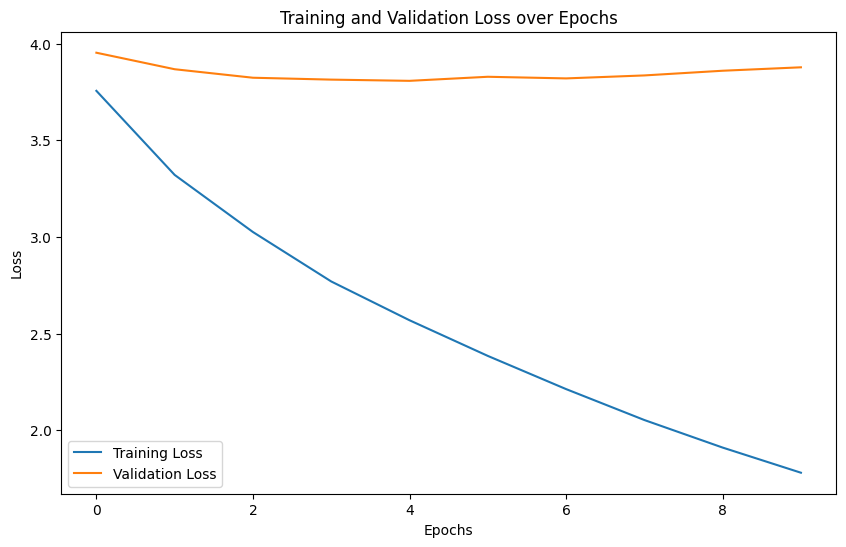

In [28]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
model.save_pretrained("tf_model/")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[61949]], 'forced_eos_token_id': 0}


## Inference
During inference, we use the fine-tuned model to generate translations for new input sentences. This step involves tokenizing the input, generating predictions, and decoding the output tokens back into text.

In [51]:
# Correct model checkpoint
model_checkpoint = "Helsinki-NLP/opus-mt-en-hi"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Load the model
model = TFAutoModelForSeq2SeqLM.from_pretrained("tf_model/")

# Example input text for translation
input_text = "My name is Himanish. I am learning about Deep Learning."

# Tokenize the input text
tokenized = tokenizer([input_text], return_tensors='np')

# Generate translation
out = model.generate(**tokenized, max_length=128)

# Decode the output
translated_text = tokenizer.decode(out[0], skip_special_tokens=True)

# Print only the translated text
print(translated_text)

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at tf_model/.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


मेरा नाम हेनिश है। मुझे गहरी समझ के बारे में पता है।


# Evaluation Metrics
### What are Evaluation Metrics?
Evaluation metrics are used to measure the performance of a model on a given task. For machine translation, common metrics include BLEU (Bilingual Evaluation Understudy) score and perplexity. These metrics provide quantitative measures to evaluate how well the model's translations match the reference translations.

### Why are Evaluation Metrics Important?
Evaluation metrics are essential for assessing the quality of a model and guiding improvements. They provide a standardized way to compare different models and configurations, helping identify the best-performing model.

## BLEU Score
BLEU (Bilingual Evaluation Understudy) is a metric used to evaluate the quality of machine-generated translations by comparing them to reference translations. It measures how many n-grams (contiguous sequences of n words) in the generated translation match the n-grams in the reference translation.

## How is BLEU Calculated?
N-gram Precision: Measures the overlap of n-grams between the candidate and reference translations. For example, unigram precision considers single words, bigram precision considers pairs of words, and so on.
Modified Precision: Limits the count of each n-gram to the maximum number in any single reference to prevent over-counting.
Brevity Penalty: Penalizes short translations. If the candidate translation is shorter than the reference, the BLEU score is reduced.
Combining Scores: The BLEU score is the geometric mean of the modified n-gram precisions multiplied by the brevity penalty.

## Advantages and Limitations
### Advantages:

- Standard benchmark for comparison.
- Language-agnostic and computationally efficient.

### Limitations:

- Focuses on n-grams and may miss semantic meaning.
- Does not account for grammatical correctness or fluency.

In [ ]:


def calculate_bleu(predictions, references):
    """
    Calculate the BLEU score between predictions and references.

    Args:
    predictions (list of str): The predicted translations.
    references (list of str): The reference translations.

    Returns:
    float: The BLEU score.
    """
    return sacrebleu.corpus_bleu(predictions, [references]).score


# Prepare the validation dataset for prediction
validation_data = tokenized_datasets["test"]

references = []
predictions = []

for example in validation_data:
    # Get the reference translation
    reference = example["translation"]["hi"]
    references.append(reference)

    # Get the input text and generate the prediction
    input_text = example["translation"]["en"]
    tokenized_input = tokenizer(input_text, return_tensors='tf', max_length=max_input_length, truncation=True)
    generated_tokens = model.generate(**tokenized_input, max_length=max_target_length)
    predicted_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
    predictions.append(predicted_text)

# Calculate BLEU score
bleu_score = calculate_bleu(predictions, references)
print(f"BLEU score for validation dataset: {bleu_score}")

## Perplexity
Perplexity is another metric often used in language models. It measures how well a probability model predicts a sample. Lower perplexity indicates better performance, as the model is better at predicting the next word in a sequence. However, it is more commonly used for language models rather than translation tasks.

## Impact of Sequence Length on Scores
As sequence length increases, the performance of traditional LSTM-based seq2seq models tends to degrade. This is due to the vanishing gradient problem and the difficulty of capturing long-term dependencies. Attention mechanisms mitigate this by allowing the model to focus on relevant parts of the input sequence, regardless of their position.

## Transformer Models
Transformer models, such as BERT, GPT, and the Helsinki-NLP model we are using, leverage self-attention mechanisms to improve handling of long sequences. These models represent the state-of-the-art in machine translation, offering significant improvements over traditional LSTM-based seq2seq models.

